In [1]:
# import necessary tools
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# NBA season we will be analyzing
year = 2019
# URL page we will scraping 
url = 'https://www.iplt20.com/stats/2019/player-points'.format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [3]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText(strip=True) for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers

['POS',
 'PLAYER',
 'Pts',
 'Mat',
 'Wkts',
 'Dots',
 '4s',
 '6s',
 'Catches',
 'Stumpings']

In [4]:
# avoid the first header row
rows = soup.findAll('tr')
player_stats = [[td.getText(strip=True) for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [5]:
stats = pd.DataFrame(player_stats, columns = headers)
stats.head(10)

,POS,PLAYER,Pts,Mat,Wkts,Dots,4s,6s,Catches,Stumpings
0,None,None,None,None,None,None,None,None,None,None
1,1,AndreRussell,369,14,11,61,31,52,4,0
2,2,HardikPandya,342,16,14,94,28,29,11,0
3,3,DeepakChahar,274.5,17,22,190,1,0,2,0
4,4,ImranTahir,255,17,26,149,0,0,6,0
5,5,Quintonde Kock,247.5,16,0,0,45,25,17,2
6,6,RashidKhan,247.5,15,17,166,2,2,4,0
7,7,RishabhPant,247,16,0,0,37,27,18,6
8,8,JaspritBumrah,240.5,16,19,169,0,0,2,0
9,9,RavindraJadeja,234.5,16,15,128,7,4,9,0


In [6]:
stats.dtypes

POS          object
PLAYER       object
Pts          object
Mat          object
Wkts         object
Dots         object
4s           object
6s           object
Catches      object
Stumpings    object
dtype: object

In [7]:
stats[['Pts','Mat','Wkts','Dots','4s','6s','Catches','Stumpings']]=stats[['Pts','Mat','Wkts','Dots','4s','6s','Catches','Stumpings']].apply(pd.to_numeric)

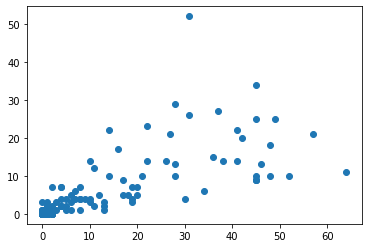

In [10]:
plt.scatter(stats['4s'],stats['6s'])

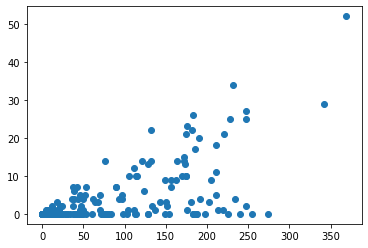

In [11]:
plt.scatter(stats['Pts'],stats['6s'])

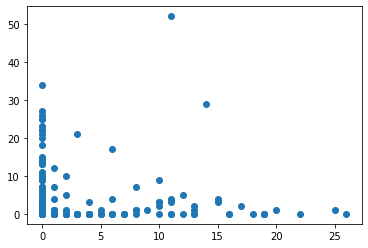

In [12]:
plt.scatter(stats['Wkts'],stats['6s'])